# Approved Permits EDA
Initial Visualizations and Exploratory data analysis. Explanations of relevant graphs and their analyses are in the report. This EDA focuses on base questions 1 and 2.

Note: This notebook was curated for use with the final report as a more polished distillation of our work. Some less interesting or important analysis is left out for brevity, but is available in the original project notebooks.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

# estimated runtime ~20 seconds

In [82]:
df = pd.read_csv("../data/cleaned_abp.csv")

# selecting columns for use
df_q1 = df[['year','class', 'description', 'value', 'fee', 'sqft', 'occupancytype']]
df_q1.head(5)

,year,class,description,value,fee,sqft,occupancytype
0,2021,INTEXT,Interior/Exterior Work,36500.00,390.0,0.0,Mixed
1,2011,COB,City of Boston,40000.00,429.0,170.0,Comm
2,2020,OTHER,Other,5000.00,70.0,0.0,1-3FAM
3,2019,INTEXT,Interior/Exterior Work,74295.75,803.0,0.0,Multi
4,2013,EXTREN,Renovations - Exterior,15000.00,206.0,0.0,1-2FAM


### Worktype over the years

In [83]:
# First, Group by year and aggregate by worktype (class), extracting the classes into individual columns
df_w = df_q1.pivot_table(index='year', columns='class', aggfunc='size', fill_value=0).reset_index().set_index('year').rename_axis(columns=None)
df_w.index.name = None

# Now sort by most approved (max so we can see interesting cases)
df_w = df_w[df_w.index >= 2010] # bad data before 2010
df_w = df_w[df_w.max().sort_values(ascending=False).index]

# Add total column
df_w.insert(0, '[TOTAL]', df_w.iloc[:, 1:].sum(axis=1))

df_w.head()

,[TOTAL],ELECTRICAL,PLUMBING,GAS,INTREN,LVOLT,FA,INTEXT,Main,OTHER,ROOF,EXTREN,SOL,INSUL,FSTTRK,Service,CHGOCC,COB,SRVCHG,INTDEM,TMPSER,CONVRT,ERECT,Capital,SIDE,SIGNES,NROCC,ADDITION,GEN,NEWCON,SPCEVE,CELL,MAINT,SITE,EXTDEM,SPRINK,FENCE,VIOL,SD,RAZE,CANP,DRIVE,PVTEMER,RESPAR,BFCHMTENT,AWNING,GARAGE,SPFT,BFCHMINFIN,COMPAR,OSEAT,INDBLR,SPRNK9,HOLVEN,AWNRNW,TEMTRL,TCOO,SIGNS,RNWSIG,TMPUSOC,FENCE2,General,AWNRET,TVTRK,CANPRN,BFCHMFLOOR,INDFUR,TRENCH,SpecEvent,FLAM,Fencing,SpeEvents,BFCHMMATTR,Staging,Dumpsters,New,BFCHMDECMA,BFCHMTEMPE,Repair
2010,28123,7426,5232,4211,3586,1561,1150,1971,0,1522,1382,1561,9,371,404,0,325,971,970,508,197,75,94,0,290,262,3,163,59,98,101,19,173,131,126,37,109,40,9,30,73,75,0,15,0,24,34,0,0,4,9,13,9,16,19,12,18,17,4,3,6,0,3,3,6,0,3,4,0,3,0,0,0,0,0,0,0,0,0
2011,30992,8921,5724,4174,3685,2454,1809,1936,0,1680,1181,1561,106,996,511,0,478,961,323,554,326,1,157,0,312,294,114,221,64,125,61,112,177,148,103,47,102,58,17,41,69,68,0,21,0,27,34,0,0,9,12,24,5,13,8,17,12,6,16,7,10,0,7,5,1,0,2,3,0,3,0,0,0,0,0,0,0,0,0
2012,32980,8766,6008,4421,3537,3397,2021,2295,7,1517,1121,1707,518,947,651,5,545,537,218,544,316,7,173,0,277,318,166,143,128,117,52,184,116,167,94,41,88,107,28,47,25,50,0,27,47,22,23,30,28,26,6,5,9,22,9,14,4,2,4,15,9,11,2,2,2,5,3,0,3,1,2,1,1,1,1,0,1,1,1
2013,33964,9257,5830,4357,3701,3291,2128,2472,0,1402,1423,1650,524,680,768,0,707,510,89,554,279,652,294,0,285,375,349,194,66,136,84,56,148,145,128,75,89,107,46,27,78,30,0,43,0,26,14,34,0,23,13,3,18,14,3,18,0,5,0,4,8,0,1,2,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0
2014,36145,10628,6351,4912,4103,3651,2307,2599,0,1411,1300,1674,904,620,1018,0,887,306,104,638,324,4,322,0,278,378,260,211,46,201,78,95,148,165,150,100,101,56,82,38,53,56,0,23,0,31,19,4,0,23,20,7,23,13,10,19,1,5,1,3,1,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Let's first visualize the worktypes (referred to as classes from now on) a few different ways (analysis for relevant plots in report and deliverables)

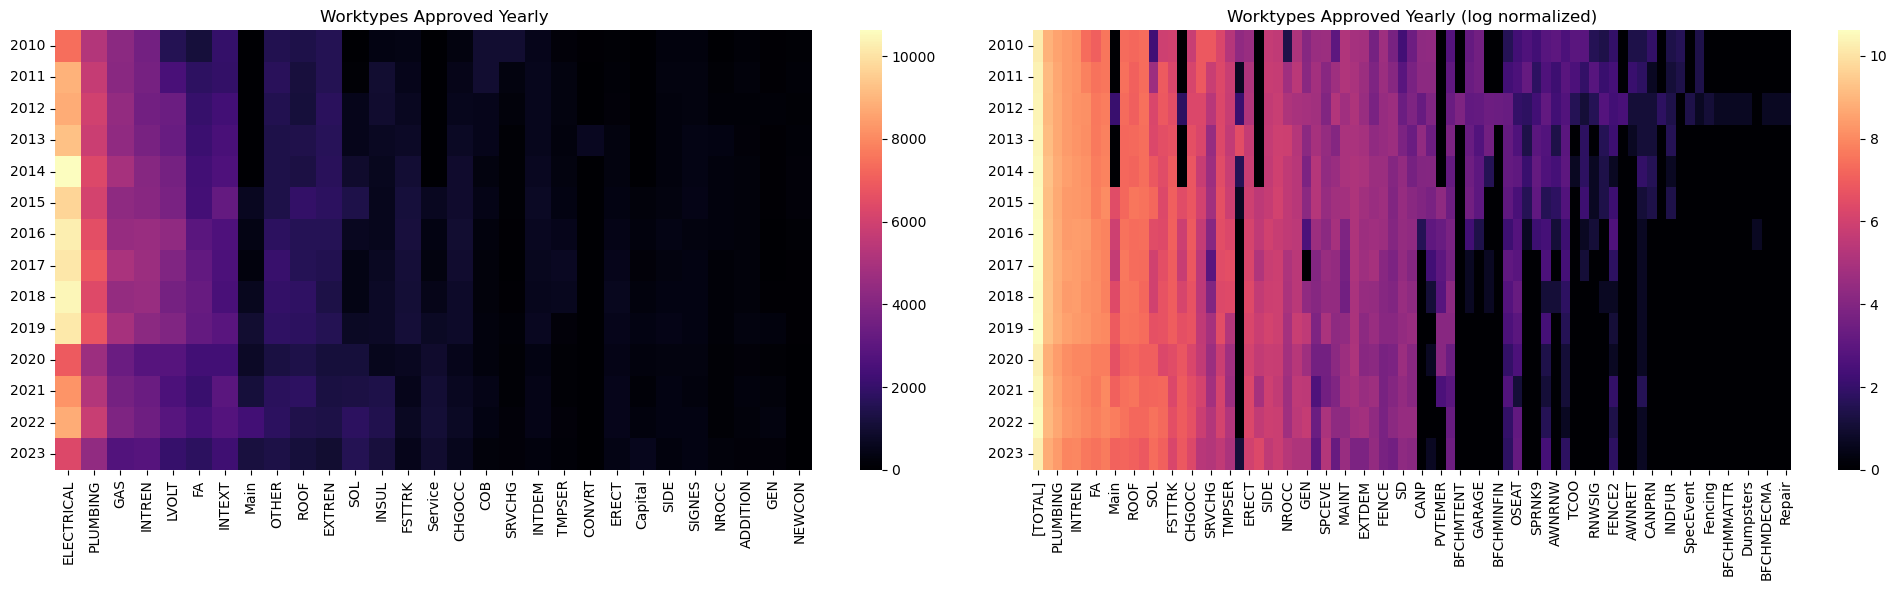

In [84]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:30], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
axes[0].set_title('Worktypes Approved Yearly')
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(df_w_norm, cmap='magma', ax=axes[1], cbar_kws={"orientation": "vertical"})
axes[1].set_title('Worktypes Approved Yearly (log normalized)')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

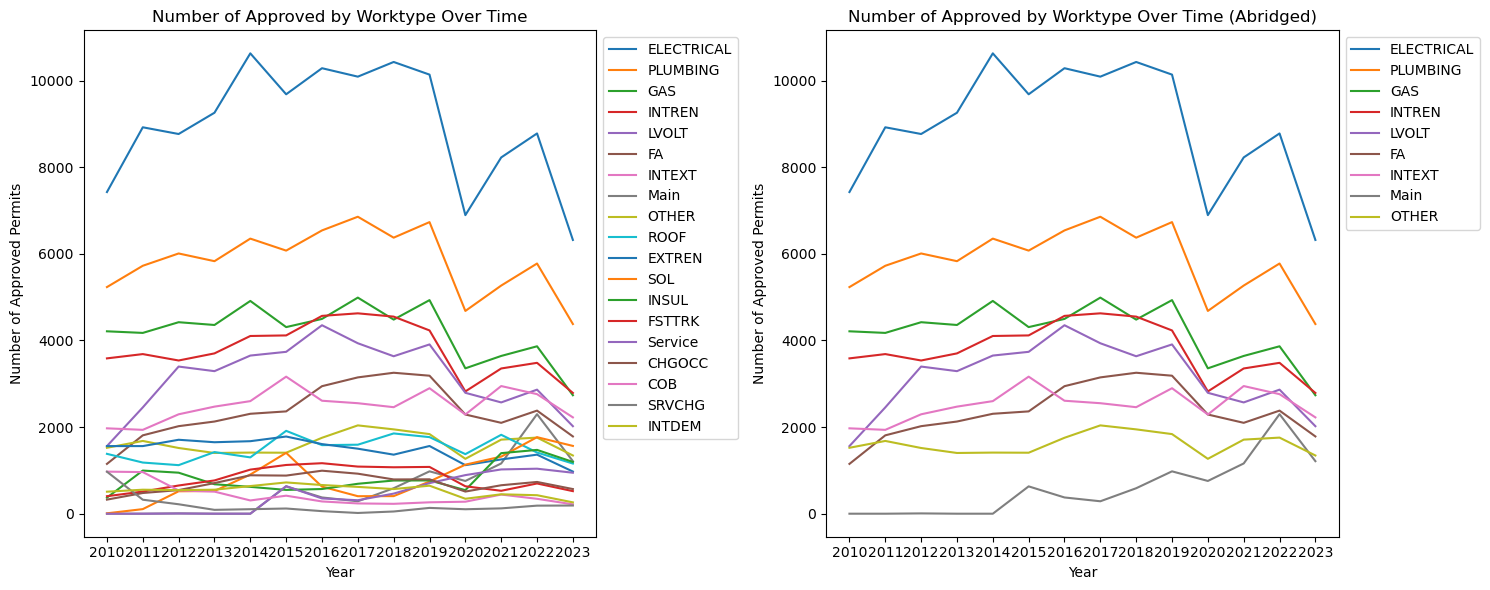

In [85]:
temp = df_w.iloc[:, 1:20]  # Get just the most significant columns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Worktype Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

temp = df_w.iloc[:, 1:10]  # Get just the most significant columns

plt.subplot(1, 2, 2)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Worktype Over Time (Abridged)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

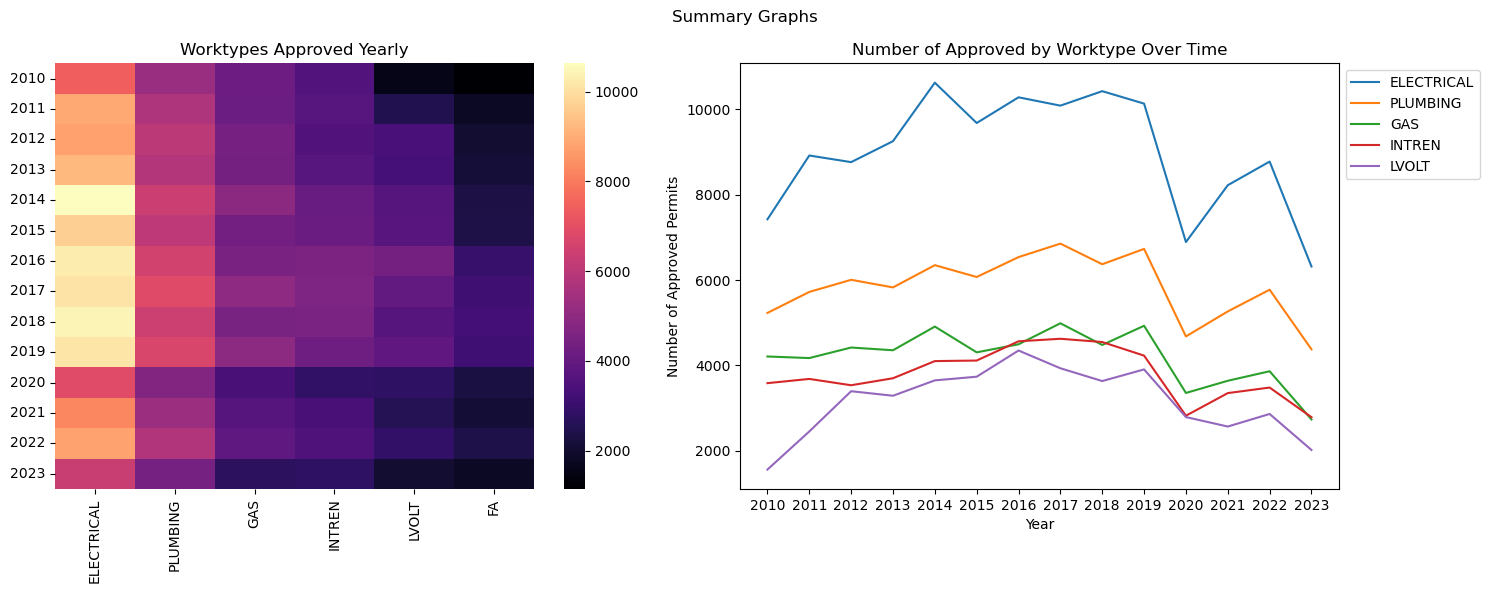

In [86]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:7], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
axes[0].set_title('Worktypes Approved Yearly')

temp = df_w.iloc[:, 1:6]  # Get just the most significant columns

plt.subplot(1, 2, 2)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Worktype Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.suptitle('Summary Graphs')
plt.tight_layout()
plt.show()

### Description

In [87]:
# First, Group by year and aggregate by description, extracting the types into individual columns
df_w = df_q1.pivot_table(index='year', columns='description', aggfunc='size', fill_value=0).reset_index().set_index('year').rename_axis(columns=None)
df_w.index.name = None

# Now sort by most approved (max so we can see interesting cases)
df_w = df_w[df_w.index >= 2010] # bad data before 2010
df_w = df_w[df_w.max().sort_values(ascending=False).index]

# Add total column
df_w.insert(0, '[TOTAL]', df_w.iloc[:, 1:].sum(axis=1))

df_w.head()

,[TOTAL],Electrical,Plumbing,Gas,Renovations - Interior NSC,Low Voltage,Fire Alarm,Interior/Exterior Work,Maintenance,Other,Roofing,Renovations - Exterior,Solar Panels,Insulation,Fast Track Application,Service,Change Occupancy,City of Boston,Service Change,Demolition - Interior,Temporary Service,From TimeMatters-PZ Conversion,Erect,Capital Improvement,Siding,Signs,No Record of Occupancy,Addition,Generators,New construction,Special Events,Cellular Tower,Annual Maintenance,Excavation Borings Test Pits,Demolition - Exterior,Fire Protection/Sprinkler,Fencing Renovation < 6Ft,Application to Correct a Violation,Subdivision Combining Lot,Removal of structure,Canopy,Driveway Installation,Prinvate Contractor-Emergency,Residential Parking,Tent,Awning,Summer Program Fast Track,Garage,Installation of InteriorFinish,Commercial Parking,Outside Seating,Industrial Boiler,Fire Protection Sprinkler >9,Holiday Vendor,Temporary Trailers,Awning Renewal,Temp COO,Temporary Signs/Banners,Renewal of Signs Permit,Temporary Change of Use & Occ,Fencing Renovation >6ft,General,Retractable Awning,Television Truck,Canopy Renewal,Installation of Floor Covering,Trench,Industrial Furnace,Special Event,Flammable and/or Explosive,Fencing,Staging,Repair,New,Installation of Decorative Mat,Temporary Enclosures,Dumpsters,Installation/Evaluation of Mat
2010,28123,7426,5232,4211,3586,1561,1150,1971,0,1522,1382,1561,9,371,404,0,325,971,970,508,197,75,94,0,290,262,3,163,59,98,101,19,173,131,126,37,109,40,9,30,73,75,0,15,0,24,0,34,0,4,9,13,9,16,12,19,18,17,4,3,6,0,3,3,6,0,4,3,0,3,0,0,0,0,0,0,0,0
2011,30992,8921,5724,4174,3685,2454,1809,1936,0,1680,1181,1561,106,996,511,0,478,961,323,554,326,1,157,0,312,294,114,221,64,125,61,112,177,148,103,47,102,58,17,41,69,68,0,21,0,27,0,34,0,9,12,24,5,13,17,8,12,6,16,7,10,0,7,5,1,0,3,2,0,3,0,0,0,0,0,0,0,0
2012,32980,8766,6008,4421,3537,3397,2021,2295,7,1517,1121,1707,518,947,651,5,545,537,218,544,316,7,173,0,277,318,166,143,128,117,53,184,116,167,94,41,88,107,28,47,25,50,0,27,47,22,30,23,28,26,6,5,9,22,14,9,4,2,4,15,9,11,2,2,2,5,0,3,3,1,2,1,1,0,1,1,1,1
2013,33964,9257,5830,4357,3701,3291,2128,2472,0,1402,1423,1650,524,680,768,0,707,510,89,554,279,652,294,0,285,375,349,194,66,136,84,56,148,145,128,75,89,107,46,27,78,30,0,43,0,26,34,14,0,23,13,3,18,14,18,3,0,5,0,4,8,0,1,2,2,0,0,4,0,0,0,0,0,0,0,0,0,0
2014,36145,10628,6351,4912,4103,3651,2307,2599,0,1411,1300,1674,904,620,1018,0,887,306,104,638,324,4,322,0,278,378,260,211,46,201,78,95,148,165,150,100,101,56,82,38,53,56,0,23,0,31,4,19,0,23,20,7,23,13,19,10,1,5,1,3,1,0,0,6,4,0,0,1,0,0,0,0,0,0,0,0,0,0


Let's first visualize the descriptions a few different ways (analysis for relevant plots in report and deliverables)

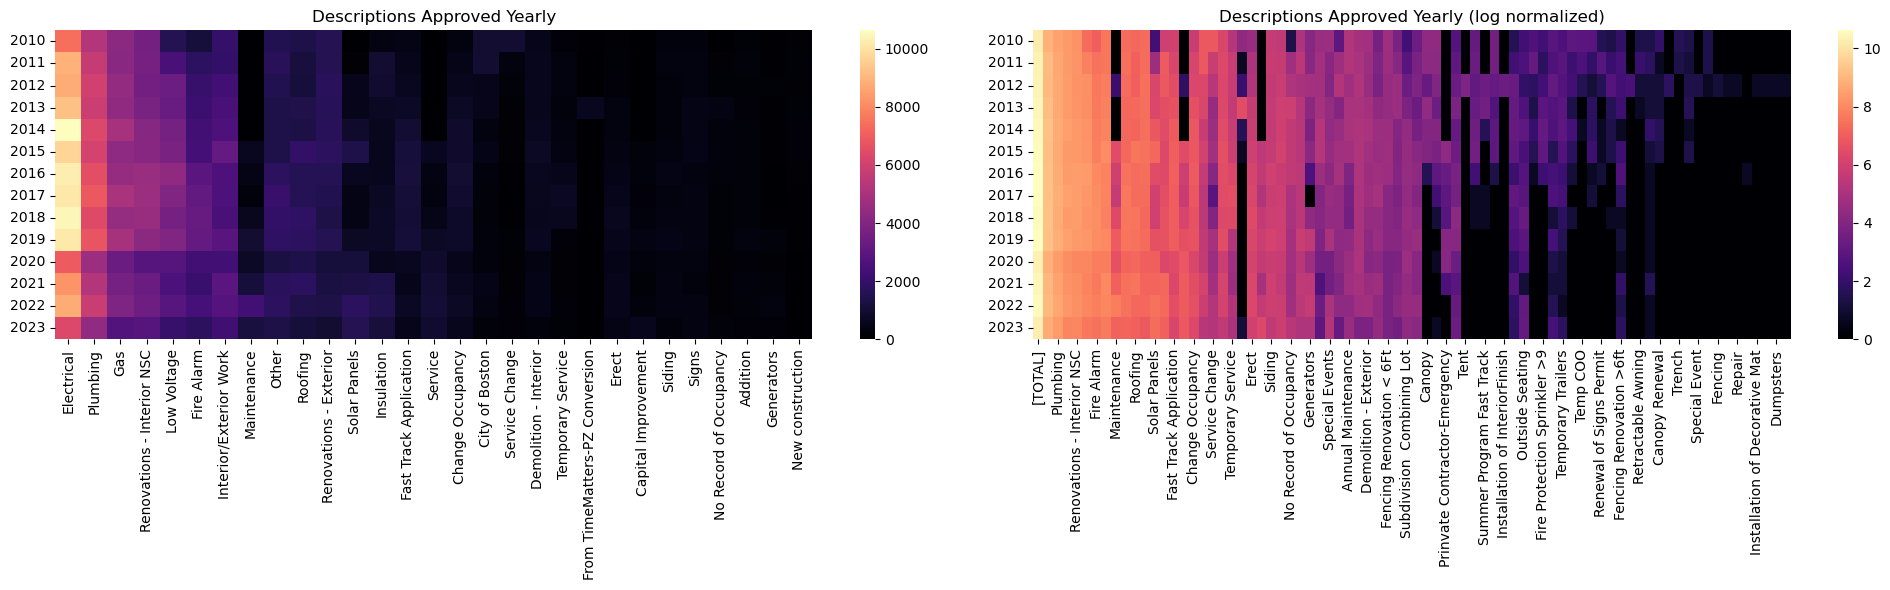

In [88]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:30], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
axes[0].set_title('Descriptions Approved Yearly')
plt.yticks(rotation=0)


plt.subplot(1, 2, 2)
sns.heatmap(df_w_norm, cmap='magma', ax=axes[1], cbar_kws={"orientation": "vertical"})
axes[1].set_title('Descriptions Approved Yearly (log normalized)')
plt.yticks(rotation=0)


plt.tight_layout()
plt.show()

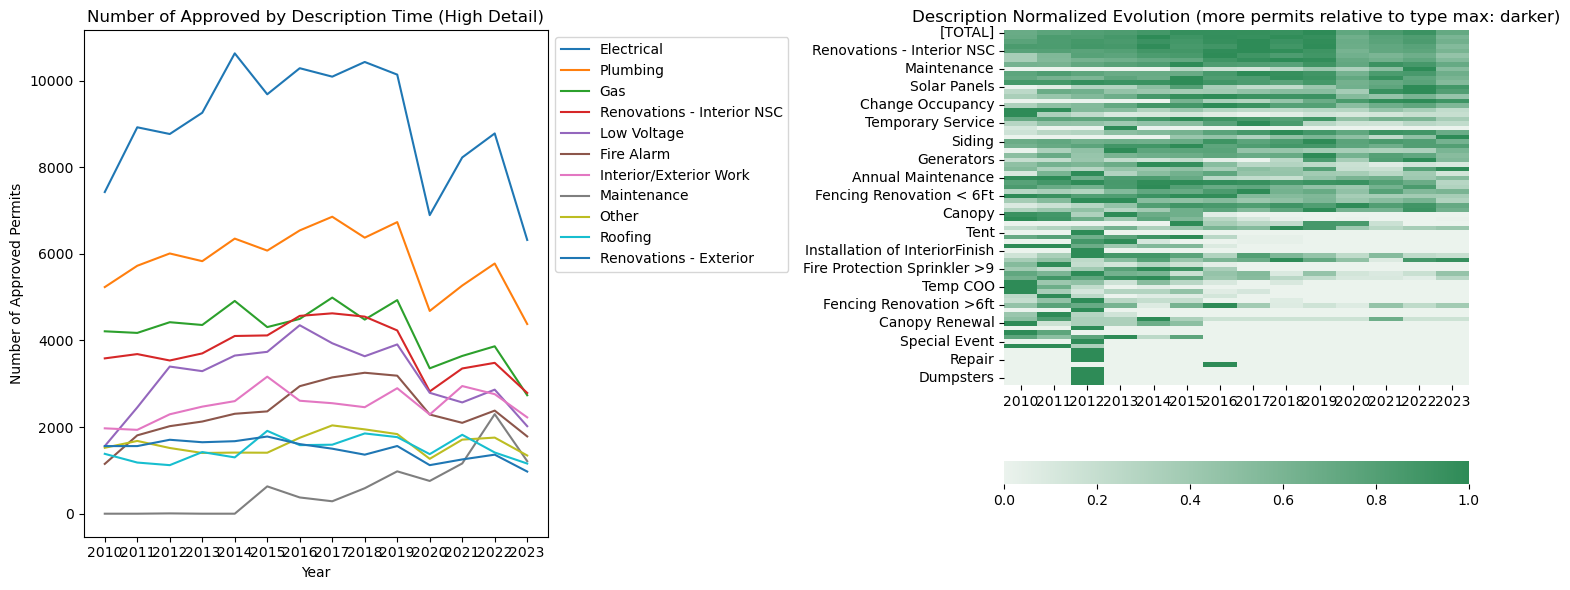

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get just the most significant columns
temp = df_w.iloc[:, 1:12]

plt.figure(figsize=(15, 6))

# First subplot - Line plot
plt.subplot(1, 2, 1)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Description Time (High Detail)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Second subplot - Heatmap
plt.subplot(1, 2, 2)
temp_normalized = df_w.div(df_w.iloc[:, 0:].max(), axis=1)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(temp_normalized.T, cmap=cmap, cbar_kws={"orientation": "horizontal"})
plt.title('Description Normalized Evolution (more permits relative to type max: darker)')

plt.tight_layout()
plt.show()


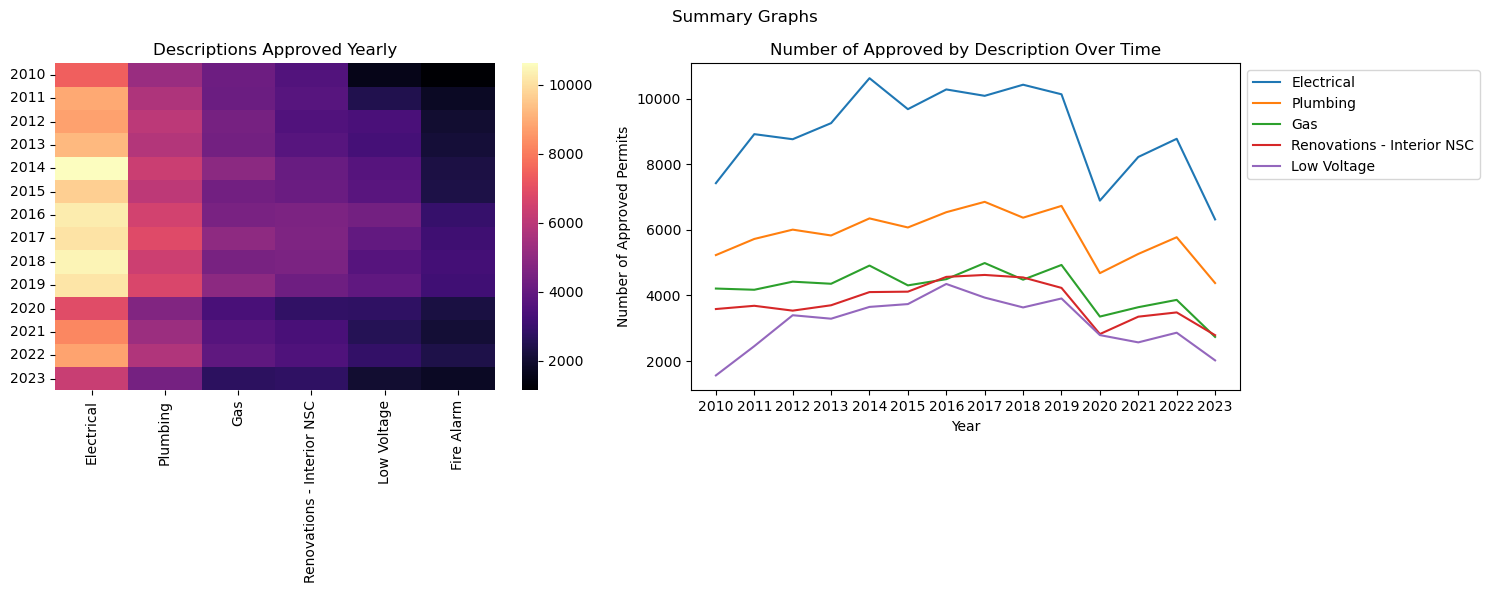

In [90]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:7], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
axes[0].set_title('Descriptions Approved Yearly')

temp = df_w.iloc[:, 1:6]  # Get just the most significant columns

plt.subplot(1, 2, 2)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Description Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.suptitle('Summary Graphs')
plt.tight_layout()
plt.show()

### Valuation

Here we will stick to a line graph and boxplot to visualize the numeric declared_valuation data

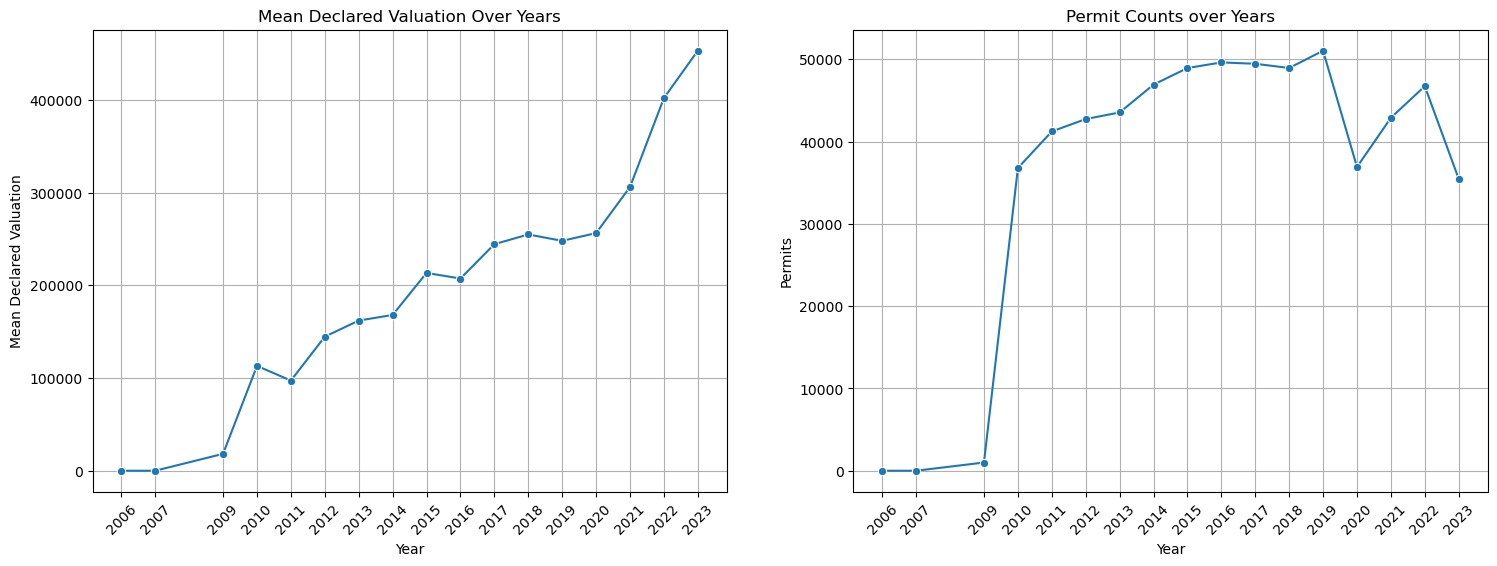

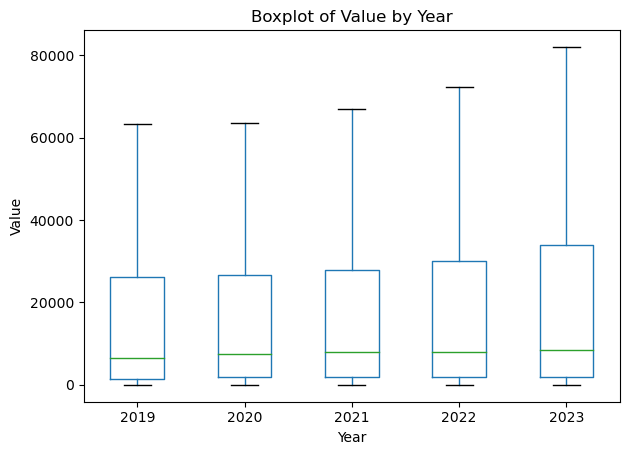

In [91]:
yearly_valuation = df_q1.groupby('year')['value'].mean().reset_index()

plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
sns.lineplot(data=yearly_valuation, x='year', y='value', marker='o')
plt.title('Mean Declared Valuation Over Years')
plt.xlabel('Year')
plt.xticks([int(year) for year in yearly_valuation.year], rotation=45)
plt.ylabel('Mean Declared Valuation')
plt.grid(True)

yearly_valuation = df.groupby('year')['value'].count().reset_index()

plt.subplot(1,2,2)
sns.lineplot(data=yearly_valuation, x='year', y='value', marker='o')
plt.title('Permit Counts over Years')
plt.xlabel('Year')
plt.xticks([int(year) for year in yearly_valuation.year], rotation=45)
plt.ylabel('Permits')
plt.grid(True)

df_q1[df_q1['year'] >= 2019].boxplot(column='value', by='year', grid=False, showfliers=False)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Boxplot of Value by Year')
plt.suptitle('')  # Remove the automatically generated title

plt.tight_layout()
plt.show()

### Square Footage

Again we will make some simple plots, since the data is numeric

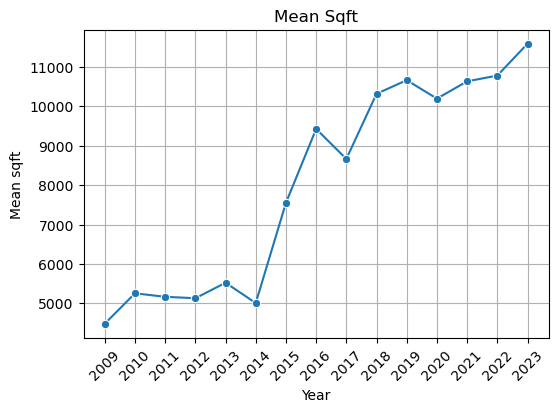

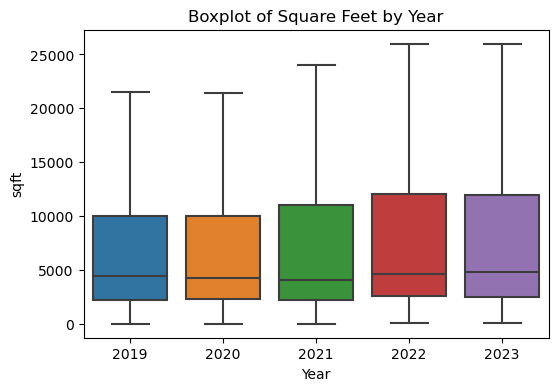

In [92]:
no_zeros = df_q1[df_q1['sqft'] > 0]
no_zeros = no_zeros[no_zeros['sqft'] < 100000]
yearly_sqft = no_zeros.groupby('year')['sqft'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(data=yearly_sqft, x='year', y='sqft', marker='o')
plt.title('Mean Sqft')
plt.xlabel('Year')
plt.xticks([int(year) for year in yearly_sqft.year], rotation=45)
plt.ylabel('Mean sqft')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='year', y='sqft', data=no_zeros[no_zeros['year'] >= 2019], showfliers=False)
plt.xlabel('Year')
plt.ylabel('sqft')
plt.title('Boxplot of Square Feet by Year')
plt.show()

### Occupancy type over the years

In [93]:
# First, Group by year and aggregate by occupancytype, extracting the types into individual columns
df_w = df_q1.pivot_table(index='year', columns='occupancytype', aggfunc='size', fill_value=0).reset_index().set_index('year').rename_axis(columns=None)
df_w.index.name = None

# Now sort by most approved (max so we can see interesting cases)
df_w = df_w[df_w.index >= 2010] # bad data before 2010
df_w = df_w[df_w.sum().sort_values(ascending=False).index]

# Add total column
df_w.insert(0, '[TOTAL]', df_w.iloc[:, 1:].sum(axis=1))

df_w.head()

,[TOTAL],1-2FAM,Comm,Multi,1-3FAM,Mixed,Other,1-4FAM,1Unit,VacLd,7More,1-7FAM,3unit,2unit,4unit,5unit,6unit,COMM,7unit,4Unit,MIXED,6Unit
2010,27217,9415,10514,2389,3732,1073,1329,1046,2672,399,1868,1004,369,369,146,137,127,3,40,0,0,0
2011,30409,10571,13318,2604,3979,1266,1325,1018,2761,335,2058,901,251,157,177,123,107,1,28,0,0,0
2012,29975,12383,13460,3473,4227,1560,1608,1131,1784,258,1399,496,158,108,112,82,105,0,14,0,0,0
2013,28669,14610,13223,5233,4555,1869,1841,1323,12,366,23,11,3,4,6,0,1,185,1,9,2,2
2014,31533,15188,14587,6025,4828,2062,1834,1546,10,613,11,6,4,0,2,3,2,0,0,0,0,0


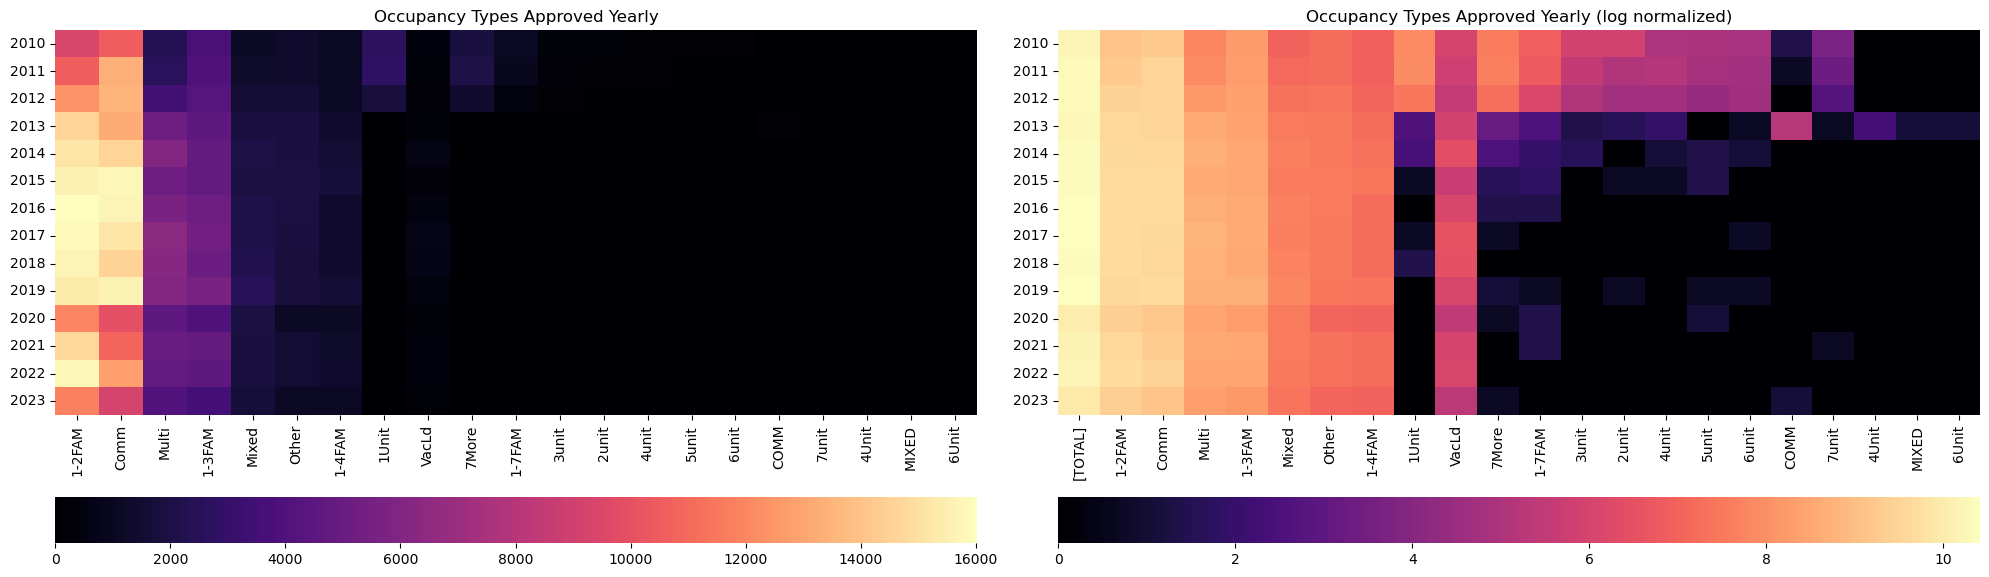

In [94]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:30], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "horizontal"})
axes[0].set_title('Occupancy Types Approved Yearly')

plt.subplot(1, 2, 2)
sns.heatmap(df_w_norm, cmap='magma', ax=axes[1], cbar_kws={"orientation": "horizontal"})
axes[1].set_title('Occupancy Types Approved Yearly (log normalized)')

plt.tight_layout()
plt.show()

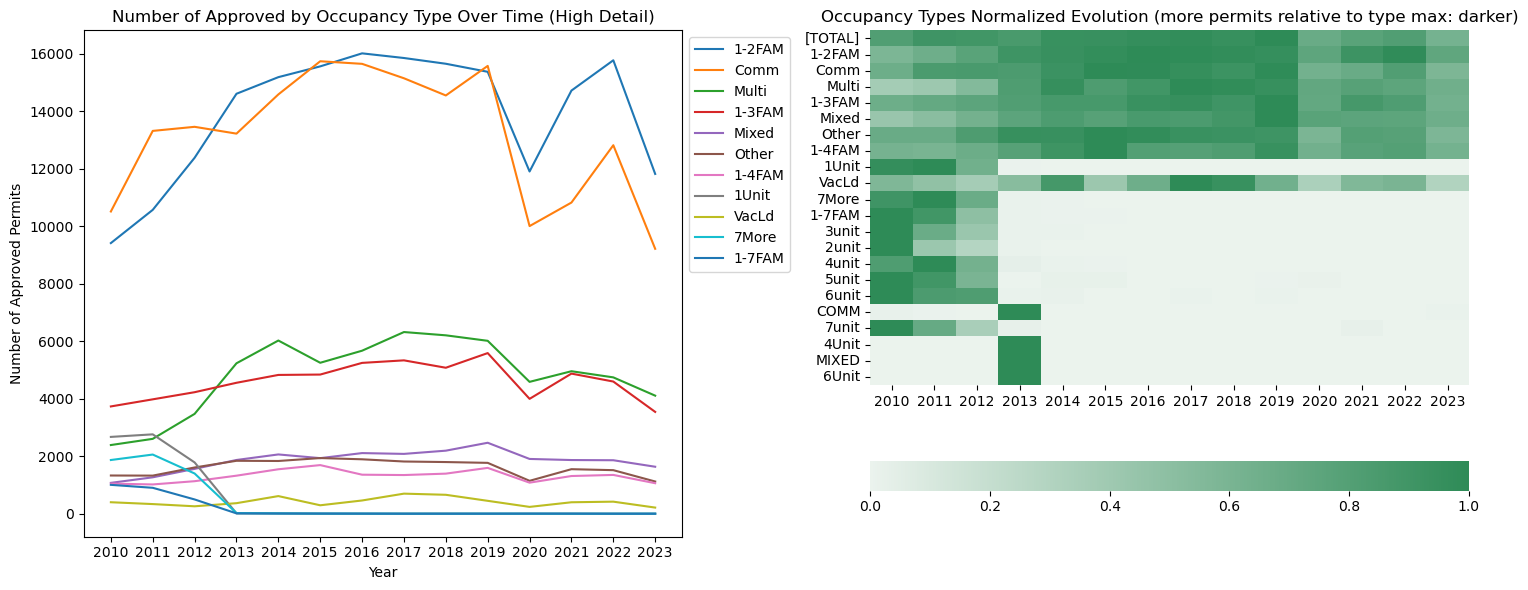

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_w is your DataFrame

# Get just the most significant columns
temp = df_w.iloc[:, 1:12]

plt.figure(figsize=(15, 6))

# First subplot - Line plot
plt.subplot(1, 2, 1)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Occupancy Type Over Time (High Detail)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Second subplot - Heatmap
plt.subplot(1, 2, 2)
temp_normalized = df_w.div(df_w.iloc[:, 0:].max(), axis=1)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(temp_normalized.T, cmap=cmap, cbar_kws={"orientation": "horizontal"})
plt.title('Occupancy Types Normalized Evolution (more permits relative to type max: darker)')

plt.tight_layout()
plt.show()


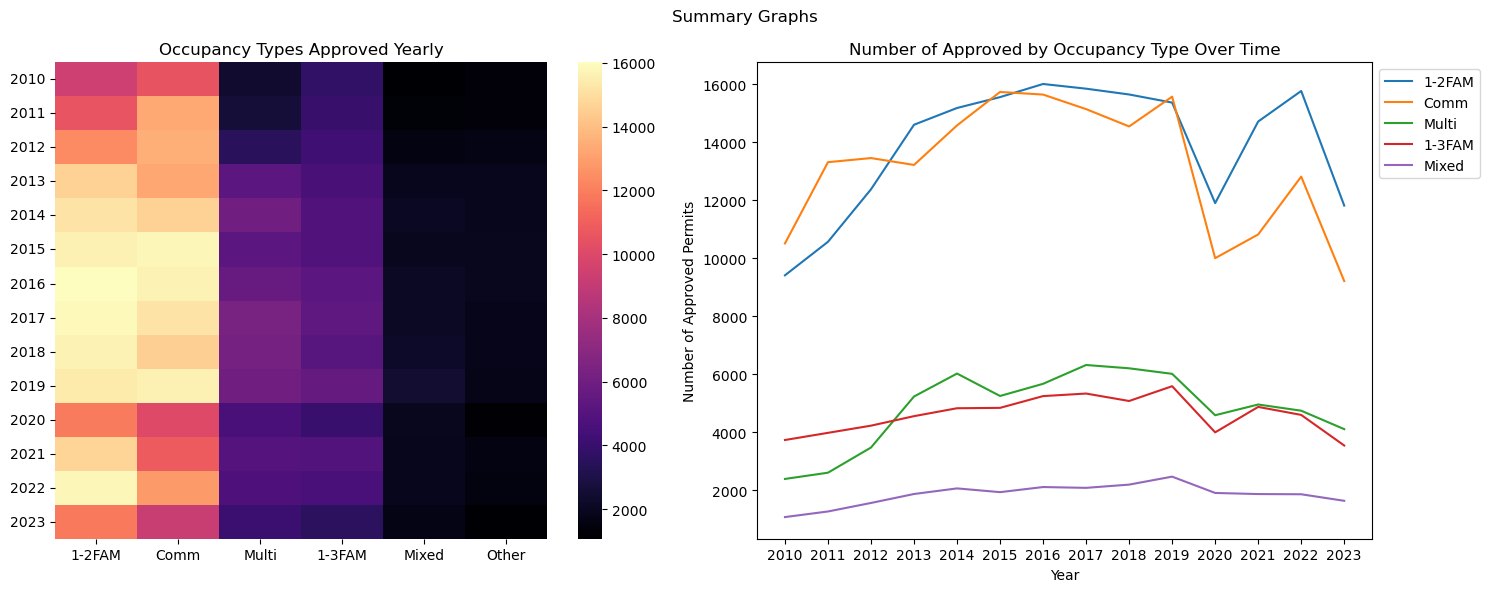

In [96]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:7], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
axes[0].set_title('Occupancy Types Approved Yearly')

temp = df_w.iloc[:, 1:6]  # Get just the most significant columns

plt.subplot(1, 2, 2)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Occupancy Type Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.suptitle('Summary Graphs')
plt.tight_layout()
plt.show()

### Additional EDA

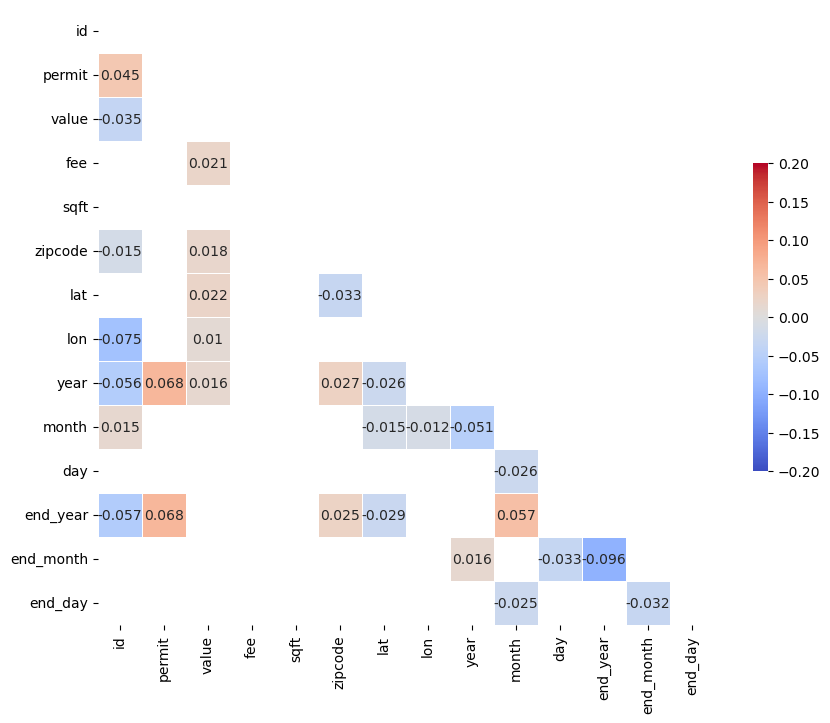

In [112]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Compute the correlation matrix exclude unwanted correlations
corr = df_numeric.corr()
corr[abs(corr) > .1] = np.nan
corr[abs(corr) < .01] = np.nan

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.2, vmin=-.2,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Show the plot
plt.show()